# Prashant Kumar Singh

# The Sparks Foundation

# Task 1

# Prediction using Supervised Machine Learning

## Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Loading the Dataset

In [2]:
df=pd.read_csv('student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Understanding the data

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* There are two columns in the dataset and there are no null values in the dataset.

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualization of the columns

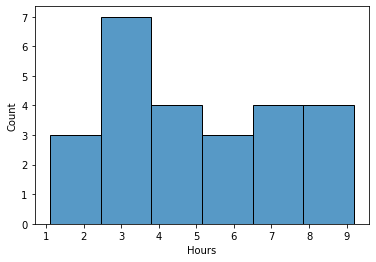

In [6]:
sns.histplot(df['Hours'])
plt.show()

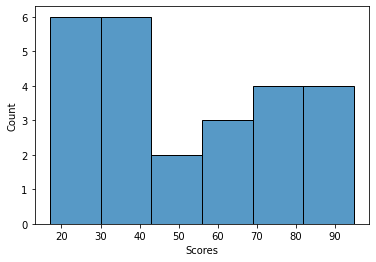

In [7]:
sns.histplot(df['Scores'])
plt.show()

### Checking the Relationship between the Hours and Scores columns

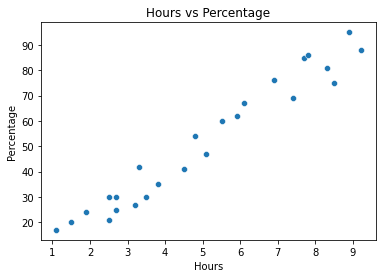

In [8]:
sns.scatterplot(x='Hours',y='Scores',data=df,marker='o')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.title('Hours vs Percentage')
plt.show()

* By the above graph we can see that there's a positive linear relationship between the two variables.

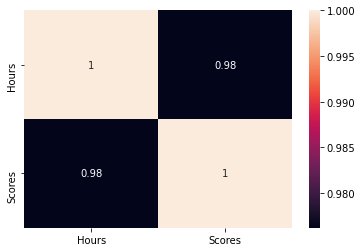

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* By heatmap, its evident that there's a strong positive correlation between the two features i.e. 98%.

## Splitting the data (Train-Test Split)

In [10]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


## Fitting the model and checking the accuracies

In [11]:
lr=LinearRegression()
lr_model=lr.fit(X_train,y_train)
print("Training Accuracy")
print(lr_model.score(X_train,y_train))
print("Testing Accuracy")
print(lr_model.score(X_test,y_test))

Training Accuracy
0.9596371297881153
Testing Accuracy
0.8880613623447958


In [12]:
predicted=lr_model.predict(X_test)

In [13]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
pred_df

,Actual,Predicted
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


## Intercept and Coefficient Value

In [14]:
print("Model intercept B0:",lr_model.intercept_)
print("Model Coefficient B1:",lr_model.coef_)

Model intercept B0: 3.3436414413187094
Model Coefficient B1: [9.67107504]


## Plotting the regression line

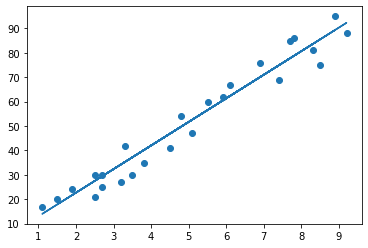

In [15]:
reg_line = lr_model.coef_*X+lr_model.intercept_

plt.scatter(X, y)
plt.plot(X, reg_line);
plt.show()

## Cross Validation Score

In [16]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(lr,X_train,y_train,cv=5)
cross_val.mean()

0.8253528590913254

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
hours = np.array(9.25)
hours=hours.reshape(-1, 1)
pred = lr_model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.80108554200021


## Performance Metrics

In [18]:
from sklearn.metrics import mean_squared_error
mse_score=mean_absolute_error(y_test,predicted)
print("Mean Squared Error:",mse_score)

Mean Squared Error: 5.91084430646127


In [19]:
rmse=np.sqrt(mse_score)
print("RMSE:",rmse)

RMSE: 2.4312228006625123


In [20]:
from sklearn.metrics import mean_squared_log_error as msle
rmsle=msle(y_test,predicted)
print("RMSE:",rmsle)

RMSE: 0.015728135511218697
